<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/sacarsmdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files

# Install Kaggle library
!pip install -q kaggle
uploaded = files.upload()

Saving Sarcasm_Headlines_Dataset.json to Sarcasm_Headlines_Dataset (3).json


Upload training data

In [0]:
import pandas as pd
import io
data1 = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset.json']), lines=True) #data is trainset

In [3]:
data1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


Upload testingdata

In [4]:
uploaded=files.upload()

Saving Sarcasm_Headlines_Dataset_v2.json to Sarcasm_Headlines_Dataset_v2 (3).json


In [0]:
data2 = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset_v2.json']), lines=True) #testset

In [0]:
data=pd.concat([data1,data2],ignore_index=True)

split data 80% training set and 20% test set

In [0]:
from sklearn.model_selection import train_test_split
X=data['headline'].str.replace('\d+', '')
y=data['is_sarcastic']
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.2,random_state=1,)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
def vectorization_sk_tfidf(x):                          #vectorization and tfidf function
  vectorizer = CountVectorizer()
  y = vectorizer.fit_transform(x)
  transformer = TfidfTransformer()
  tfidf = transformer.fit_transform(y).toarray()
  return tfidf
X_traintfidf=vectorization_sk_tfidf(X_train)


NAIVE BAYES


0.9577082956804627


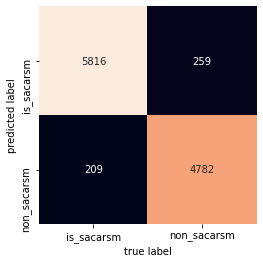

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns;
import numpy as np
import matplotlib.pyplot as plt
target_name=['is_sacarsm','non_sacarsm']
model=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),
               ('tfidf',TfidfTransformer(False)),
               ('clf',MultinomialNB(alpha=0.01)),
])

model.fit(X_train,y_train)
y_model=model.predict(X_validation)
mat = confusion_matrix(y_validation, y_model)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label');
print(accuracy_score(y_validation,y_model)) #performance


In [9]:
def predict_category(s,train=data,model=model):
   pred = model.predict(s)
   if (pred==1): print("is_sacarsm")
   else: print("non_sarcasm")
predict_category(["it was, for, uh, medical reasons,’ says doctor to boris johnson, explaining why they had to give him haircut"])

non_sarcasm


SVM

In [51]:
from sklearn.linear_model import SGDClassifier
text_clf_svm=Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('clf-svm',SGDClassifier(random_state=42)),
])
text_clf_svm.fit(X_train,y_train)
predict_svm=text_clf_svm.predict(X_validation)
accuracy_score(y_validation,predict_svm)

0.8772817639616844

Grid Search


In [20]:
from sklearn.model_selection import GridSearchCV
parameters={ 'vect__ngram_range':[(1,1),(1,2)],
              'tfidf__use_idf': (True,False),
              'clf__alpha':(1e-2,1e-3), 
           }
gs_clf=GridSearchCV(model,parameters,n_jobs=-1)
gs_clf.fit(X_train,y_train)
gs_clf.best_score_
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

In [47]:
parameters_svm={'vect__ngram_range':[(1,1),(1,2)],
                'tfidf__use_idf': (True,False),
                'clf-svm__alpha':(1e-2,1e-3),
               }
gs_clf_svm=GridSearchCV(text_clf_svm,parameters_svm,n_jobs=-1)
gs_clf_svm.fit(X_train,y_train)
gs_clf_svm.best_score_
gs_clf_svm.best_params_

{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

0.8841496475691307